# TMDB Movie Dataset EDA, Modeling, and Recommender System


In [1]:
# Disable warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## 1. Data Loading and Gain Info


In [3]:
df_credits = pd.read_csv("Dataset/tmdb_5000_credits.csv")
df_movies = pd.read_csv("Dataset/tmdb_5000_movies.csv")

In [4]:
df_credits.head().T

,0,1,2,3,4
movie_id,19995,285,206647,49026,49529
title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df_movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [6]:
# Check for Joining Key
(df_credits.movie_id != df_movies.id).any().sum()
# 0 means we can join the two dataframes on movie_id

0

Combine the data from the following files:
- tmdb_5000_credits.csv
- tmdb_5000_movies.csv

The dataset is from Kaggle: https://www.kaggle.com/tmdb/tmdb-movie-metadata

Join the two datasets on the 'id' column.

In [7]:
df = df_movies.merge(
    df_credits, left_on="id", right_on="movie_id", suffixes=("_movies", "_credits")
)
df.drop(["id"], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [9]:
# Drop columns that are not useful
df.drop(["homepage", "status", "production_countries"], axis=1, inplace=True)


Handle the missing values.

In [10]:
# Replace overview and tagline NaN with empty string
df["overview"].fillna("", inplace=True)
df["tagline"].fillna("", inplace=True)
# Replace runtime NaN with median
df["runtime"].fillna(df["runtime"].median(), inplace=True)
# Replace release_date NaN with 1st January 2000
df["release_date"].fillna("2000-01-01", inplace=True)
# Find missing values
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
tagline                 0
title_movies            0
vote_average            0
vote_count              0
movie_id                0
title_credits           0
cast                    0
crew                    0
dtype: int64

## 2. Data cleaning and Preprocessing


Some features are in json format, we need to convert them to a list of strings.

In [11]:
# Convert JSON columns to list
import json


def convert_json_to_list(df, columns):
    for column in columns:
        df[column] = df[column].apply(json.loads)
    return df


df = convert_json_to_list(
    df,
    ["genres", "keywords", "production_companies", "spoken_languages", "cast", "crew"],
)

df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
keywords,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


Some features in json format with id and name, we need to extract the name.

In [12]:
# Convert [{""id"": 12, ""name"": ""Adventure""}] to [Adventure]
def convert_json_to_list(df, columns, key="name", limit=5):
    """
    Convert JSON columns to list of values
    Just keep the first 5 values
    """
    for column in columns:
        if df[column][0] and key in df[column][0][0]:
            df[column] = df[column].apply(lambda x: [i[key] for i in x][:limit])
    return df


def director_and_producer(df):
    df["crew"] = df["crew"].apply(
        lambda x: [
            i["name"] for i in x if i["job"] == "Director" or i["job"] == "Producer"
        ]
    )
    return df


df = convert_json_to_list(
    df, ["genres", "keywords", "production_companies", "spoken_languages", "cast"]
)
df = director_and_producer(df)

In [13]:
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Adventure, Fantasy, Action]","[Action, Adventure, Crime]","[Action, Crime, Drama, Thriller]","[Action, Adventure, Science Fiction]"
keywords,"[culture clash, future, space war, space colon...","[ocean, drug abuse, exotic island, east india ...","[spy, based on novel, secret agent, sequel, mi6]","[dc comics, crime fighter, terrorist, secret i...","[based on novel, mars, medallion, space travel..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[Ingenious Film Partners, Twentieth Century Fo...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Columbia Pictures, Danjaq, B24]","[Legendary Pictures, Warner Bros., DC Entertai...",[Walt Disney Pictures]
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


## 3. Exploratory Data Analysis (EDA)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4803.0,1.068742e+02,2.260736e+01,0.0,94.00000,1.030000e+02,1.175000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
movie_id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05


Selecting numerical features for EDA.

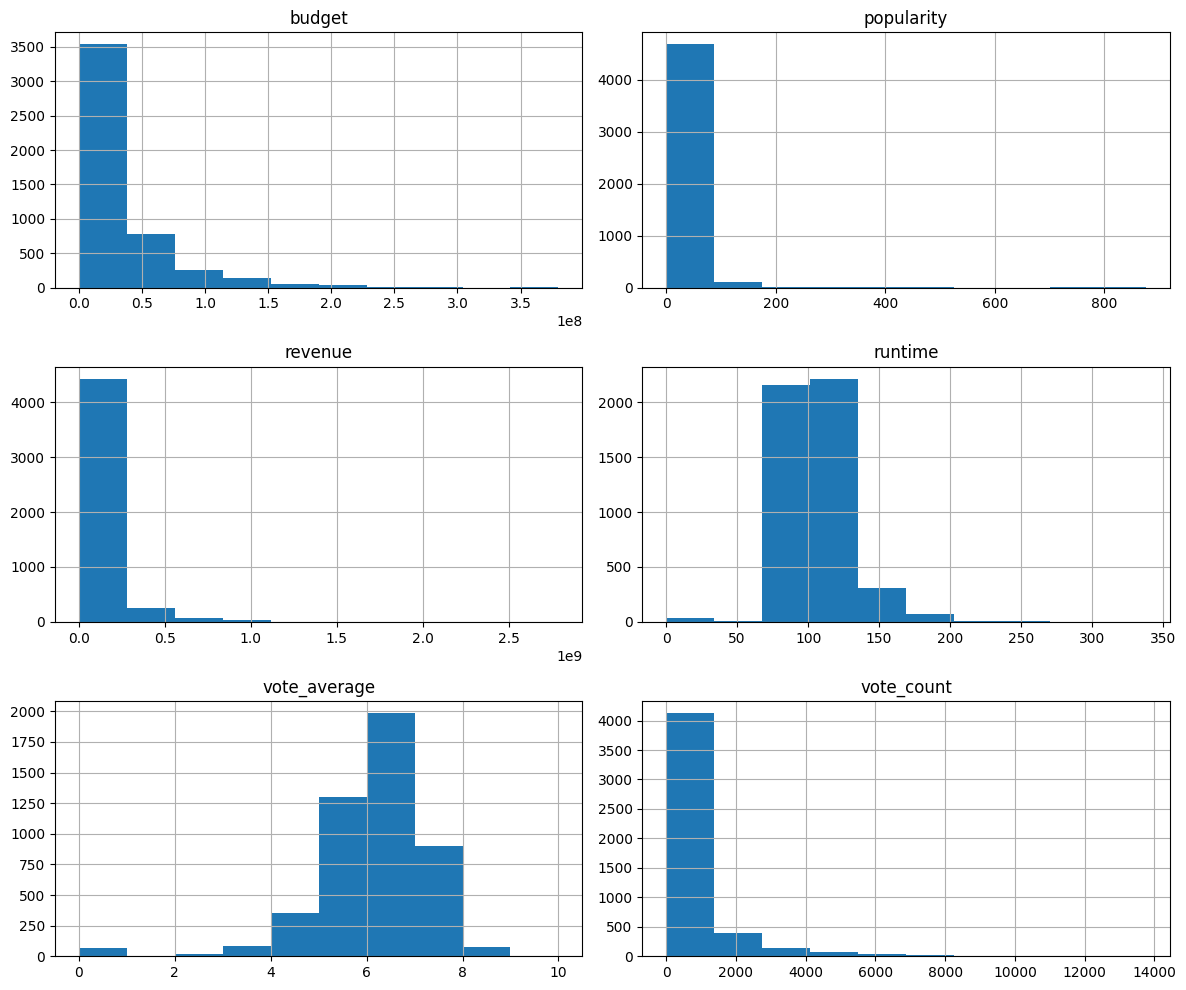

In [15]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    "movie_id"
)
df[numerical_features].hist(figsize=(12, 10))

plt.tight_layout()
plt.show()

Shape before removing outliers: (4803, 20)
Shape after removing outliers: (3331, 20)


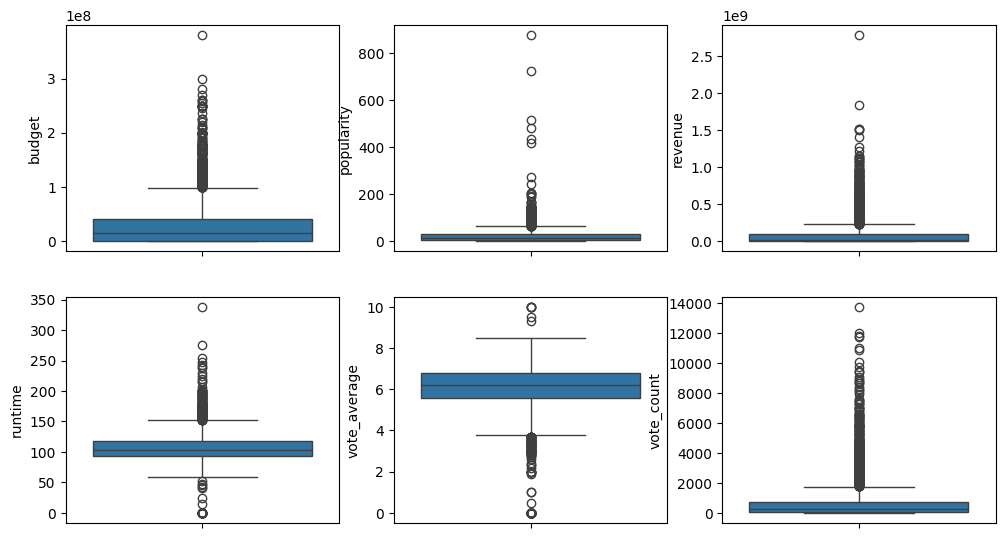

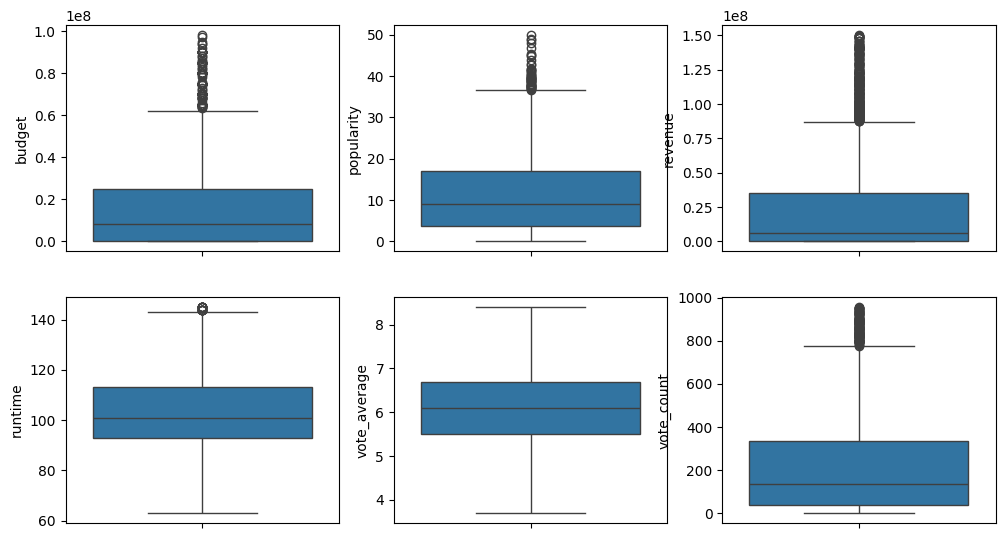

In [16]:
# Check for outliers
def check_for_outliers(df, columns):
    plt.figure(figsize=(12, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(df[column])

check_for_outliers(df, numerical_features)

# Remove outliers
def remove_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df
print(f'Shape before removing outliers: {df.shape}')
df = remove_outliers(df, numerical_features)
print(f'Shape after removing outliers: {df.shape}')
check_for_outliers(df, numerical_features)

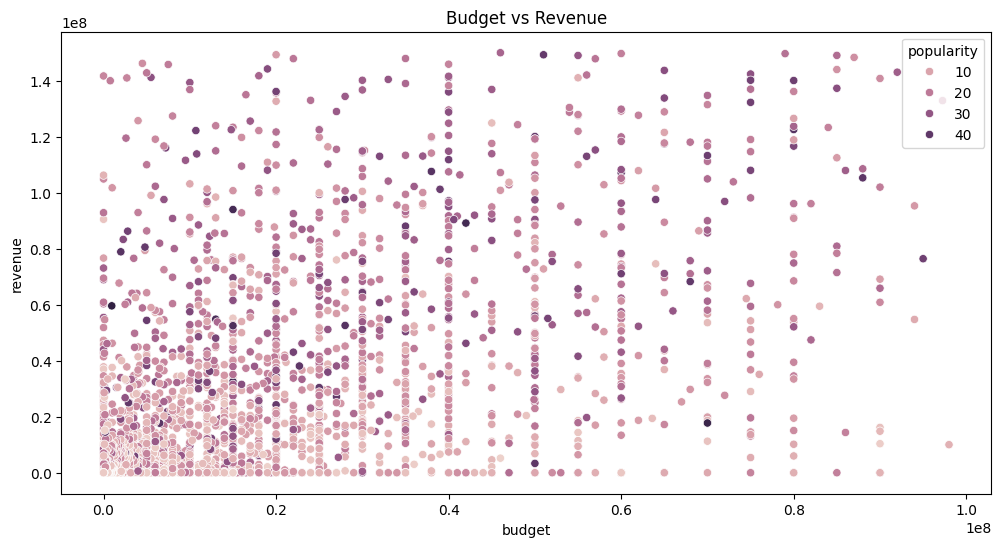

In [17]:
# colorful Plot budget vs revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x="budget", y="revenue", data=df, hue="popularity")
plt.title("Budget vs Revenue")
plt.show()



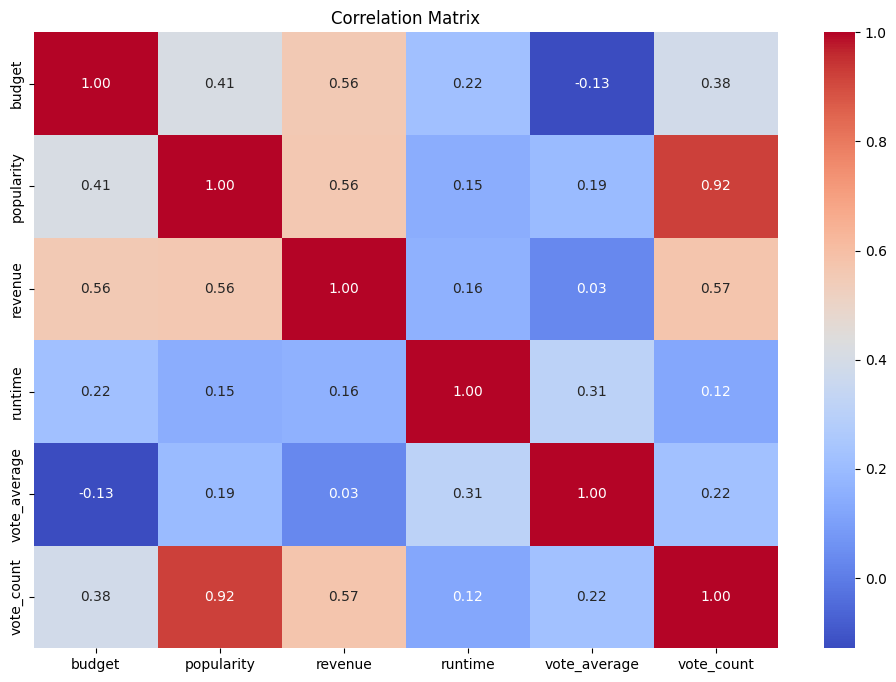

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 4. Data Modeling (Using different ML models)


Add new features to the dataset which called 'profitable' and shows that if the movie revenue is greater than the budget or not.

In [19]:
# Add feature 'profitable'
df["profitable"] = df["revenue"] > df["budget"]

# How many movies are profitable?
df["profitable"].value_counts()

profitable
False    1948
True     1383
Name: count, dtype: int64

For feature selection as we use numerical models, we should use numerical features except for the 'review' feature. (profitable is true or false not numerical)

In [20]:
# Feature selection
# Select numerical features
column_X = df.select_dtypes(include=["int64", "float64"]).drop(
    ["movie_id", "revenue"], axis=1
).columns
print(column_X)

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count'], dtype='object')


Using our features to create X and profitable as y. Then split the data into train and test.

In [21]:
# Split the data into X and y
X = df[column_X]
y = df["profitable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Since all the model has the same structure, we can use a for loop to train and test all the models. So I create a function which takes the model as input and returns statistics of the model and plot for ROC curve.

In [22]:
def analyze_model(model, X_train, y_train, X_test, y_test):
    # Start a timer
    start = time.time()
    print("\n", "=" * 50, sep="")
    print(model.__class__.__name__)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    roc_auc = round(roc_auc_score(y_test, y_pred_proba), 3)
    print("ROC AUC Score:", roc_auc)
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(model.__class__.__name__ + " ROC Curve")
    plt.show()
    
    print("Run Time:", round(time.time() - start, 2), "s")
    print("=" * 50, "\n")

    return accuracy, precision, recall, f1, roc_auc


I use the following models:
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting
- AdaBoost
- XGBoost
- Extra Trees

At the end, I compare the models and select the best model in a table.


LogisticRegression
Accuracy: 0.724
Precision: 0.769
Recall: 0.519
F1 Score: 0.62
ROC AUC Score: 0.782


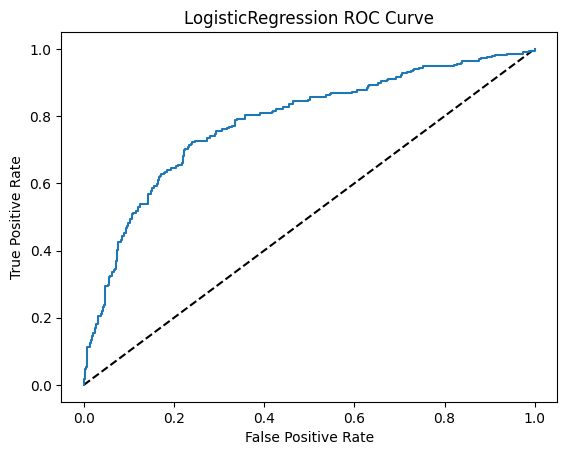

Run Time: 0.5 s


DecisionTreeClassifier
Accuracy: 0.672
Precision: 0.633
Recall: 0.578
F1 Score: 0.604
ROC AUC Score: 0.661


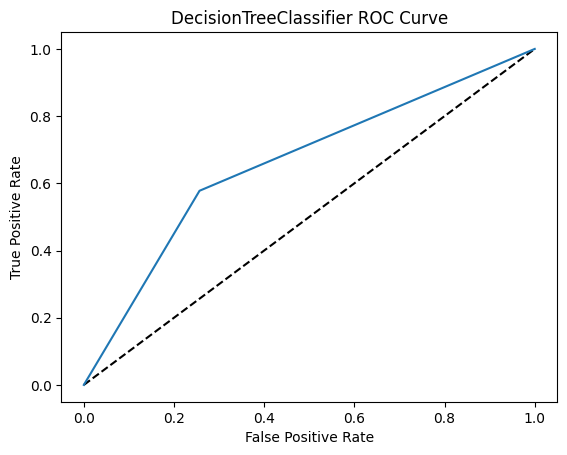

Run Time: 0.18 s


RandomForestClassifier
Accuracy: 0.706
Precision: 0.67
Recall: 0.633
F1 Score: 0.651
ROC AUC Score: 0.787


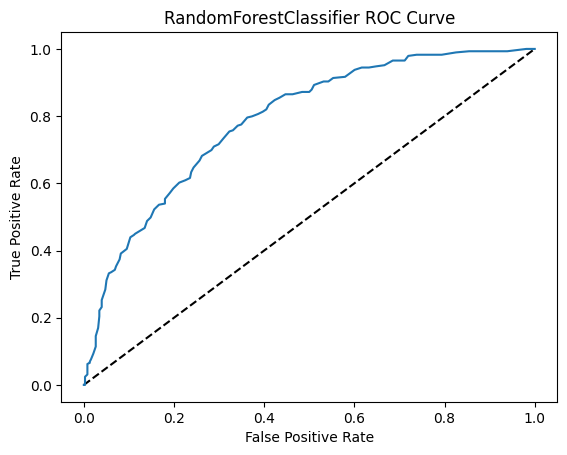

Run Time: 0.34 s


XGBClassifier
Accuracy: 0.694
Precision: 0.656
Recall: 0.619
F1 Score: 0.637
ROC AUC Score: 0.767


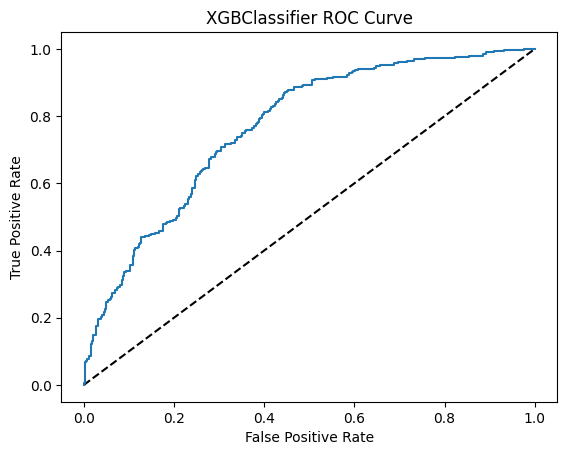

Run Time: 0.3 s


KNeighborsClassifier
Accuracy: 0.658
Precision: 0.622
Recall: 0.54
F1 Score: 0.578
ROC AUC Score: 0.727


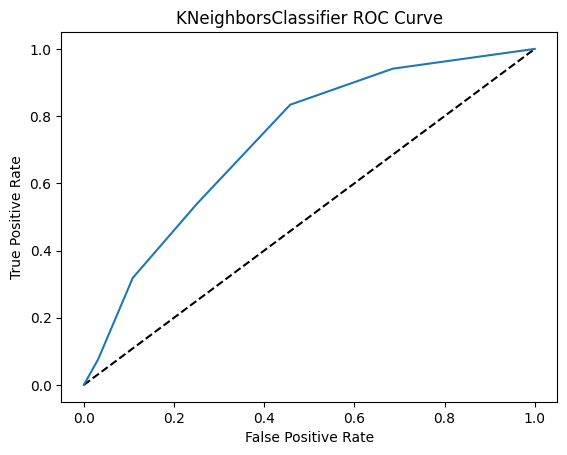

Run Time: 0.08 s


GradientBoostingClassifier
Accuracy: 0.723
Precision: 0.691
Recall: 0.651
F1 Score: 0.67
ROC AUC Score: 0.799


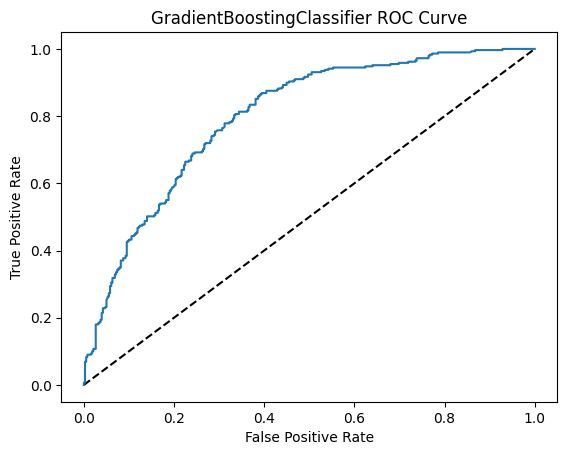

Run Time: 0.31 s


AdaBoostClassifier
Accuracy: 0.726
Precision: 0.698
Recall: 0.647
F1 Score: 0.671
ROC AUC Score: 0.784


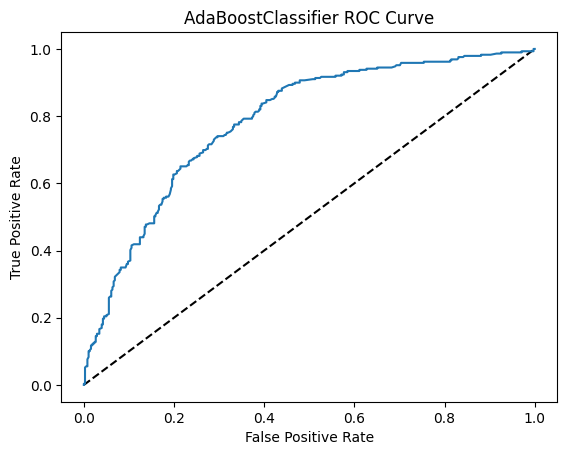

Run Time: 0.14 s


BaggingClassifier
Accuracy: 0.679
Precision: 0.661
Recall: 0.533
F1 Score: 0.59
ROC AUC Score: 0.738


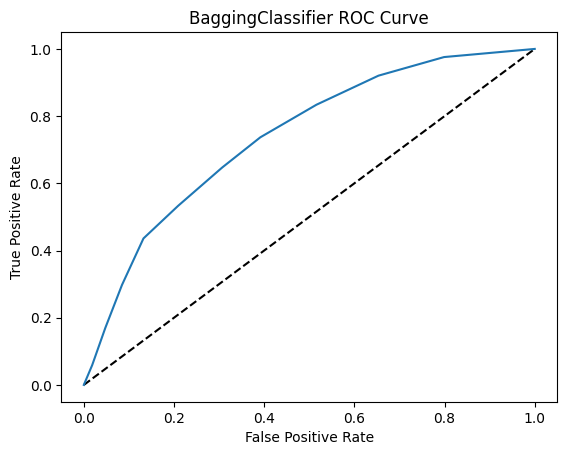

Run Time: 0.12 s


ExtraTreesClassifier
Accuracy: 0.702
Precision: 0.667
Recall: 0.623
F1 Score: 0.644
ROC AUC Score: 0.782


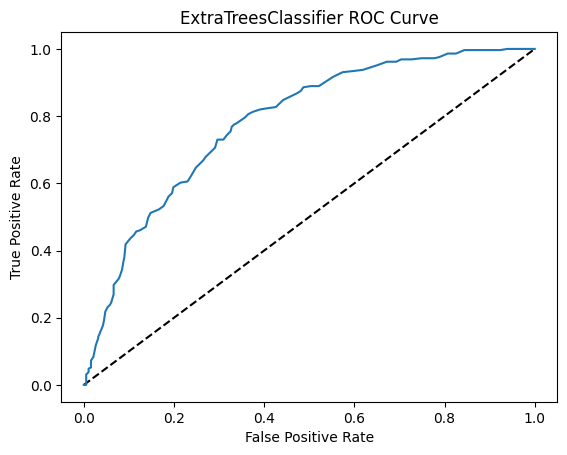

Run Time: 0.23 s



,Model,Accuracy,Precision,Recall,F1,ROC AUC
5,GradientBoostingClassifier,0.723,0.691,0.651,0.670,0.799
2,RandomForestClassifier,0.706,0.670,0.633,0.651,0.787
6,AdaBoostClassifier,0.726,0.698,0.647,0.671,0.784
0,LogisticRegression,0.724,0.769,0.519,0.620,0.782
8,ExtraTreesClassifier,0.702,0.667,0.623,0.644,0.782
3,XGBClassifier,0.694,0.656,0.619,0.637,0.767
7,BaggingClassifier,0.679,0.661,0.533,0.590,0.738
4,KNeighborsClassifier,0.658,0.622,0.540,0.578,0.727
1,DecisionTreeClassifier,0.672,0.633,0.578,0.604,0.661


In [23]:
# Test different models
# Logistic Regression, Decision Tree, Random Forest, 
# XGBoost, KNN, Gradient Boosting, AdaBoost, Bagging, Extra Trees
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
]
analyzes = []
for model in models:
    accuracy, precision, recall, f1, roc_auc = analyze_model(
        model, X_train, y_train, X_test, y_test
    )
    analyzes.append(
        {
            "Model": model.__class__.__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
        }
    )

# Print the results in a table
results = pd.DataFrame(analyzes).sort_values(by="ROC AUC", ascending=False)
results

Gradient Boosting is the best model with 0.8 accuracy and 0.87 AUC.

## 6. Recommender System

In [24]:
df.head().T

,83,97,235,265,272
budget,27000000,15000000,97250400,0,90000000
genres,"[Action, Adventure, Science Fiction, Romance]","[Action, Adventure, Drama, Horror, Science Fic...","[Fantasy, Adventure, Comedy, Family]","[Comedy, Fantasy, Family]","[Comedy, Romance]"
keywords,[],"[monster, godzilla, giant monster, destruction...","[competition, greece, colosseum, olympic games...","[cat, brother sister relationship, boredom, ch...","[architect, cellist, friends, anniversary]"
original_language,en,ja,fr,en,en
original_title,The Lovers,シン・ゴジラ,Astérix aux Jeux Olympiques,The Cat in the Hat,Town & Country
overview,The Lovers is an epic romance time travel adve...,From the mind behind Evangelion comes a hit la...,Astérix and Obélix have to win the Olympic Gam...,Conrad and Sally Walden are home alone with th...,Porter Stoddard is a well-known New York archi...
popularity,2.418535,9.476999,20.344364,18.251129,1.004579
production_companies,"[Corsan, Bliss Media, Limelight International ...","[Cine Bazar, Toho Pictures]","[Constantin Film, TF1 Films Productions, Pathé...","[Imagine Entertainment, DreamWorks SKG, Univer...",[New Line Cinema]
release_date,2015-02-13,2016-07-29,2008-01-13,2003-11-21,2001-04-27
revenue,0,77000000,132900000,0,10372291


Create a recommender system that recommends movies based on the user's input movie. The recommender system will use the cosine similarity to recommend the most similar movies to the user's input movie.

Use the following steps to create the recommender system:

- Create vectors for each movie based on the plot description (overview) and genre 

Fiture we will use:
- Cast
- Crew
- Keywords
- Genre


In [25]:
df2 = df[["cast", "crew", "keywords", "genres"]]
df2.head()

,cast,crew,keywords,genres
83,"[Josh Hartnett, Simone Kessell, Tamsin Egerton...","[Roland Joffé, Paul Breuls, Catherine Vandelee...",[],"[Action, Adventure, Science Fiction, Romance]"
97,"[Hiroki Hasegawa, Yutaka Takenouchi, Satomi Is...","[Hideaki Anno, Shinji Higuchi, Kazutoshi Wadak...","[monster, godzilla, giant monster, destruction...","[Action, Adventure, Drama, Horror, Science Fic..."
235,"[Clovis Cornillac, Gérard Depardieu, Franck Du...","[Thomas Langmann, Thomas Langmann, Frédéric Fo...","[competition, greece, colosseum, olympic games...","[Fantasy, Adventure, Comedy, Family]"
265,"[Mike Myers, Dakota Fanning, Spencer Breslin, ...","[Brian Grazer, Bo Welch]","[cat, brother sister relationship, boredom, ch...","[Comedy, Fantasy, Family]"
272,"[Warren Beatty, Diane Keaton, Goldie Hawn, Gar...",[Peter Chelsom],"[architect, cellist, friends, anniversary]","[Comedy, Romance]"


Convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [26]:
def change_names(s):
    # Check if the value is a list
    if isinstance(s, list):
        return [i.title().replace(" ", "") for i in s]
    # If the value is a string, return lower case and remove spaces
    elif isinstance(s, str):
        return s.lower().replace(" ", "")
    else:
        return ""
    
# Apply the function to your series
features = ["cast", "crew"]
for feature in features:
    df[feature] = df[feature].apply(change_names)



Create a metadata soup, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director, keywords and genres). 

Then create TfIdfVectorizer and fit and transform the metadata soup. 

In [27]:
# Function to create a soup of features
def create_soup(x):
    return " ".join(x["keywords"]) + " " + " ".join(x["cast"]) + " " + " ".join(x["crew"]) + " " + " ".join(x["genres"])  

# Create the new soup feature
df2["soup"] = df2.apply(create_soup, axis=1)

# Display the soup of the first movie
print(df2.iloc[0]["soup"])

# Create a new TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2["soup"])

# Output the shape of tfidf_matrix
tfidf_matrix.shape


 Josh Hartnett Simone Kessell Tamsin Egerton Alice Englert Bipasha Basu Roland Joffé Paul Breuls Catherine Vandeleene Guy J. Louthan Grant Bradley Ajey Jhankar Dale G. Bradley Action Adventure Science Fiction Romance


(3331, 15117)

Then use the cosine_similarity to calculate the similarity between the movies. 



In [28]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Finally, create a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [29]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df["title_movies"]).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    print(sim_scores)

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df["title_movies"].iloc[movie_indices]

# Get recommendations for The Godfather
get_recommendations("The Godfather")


KeyError: 'The Godfather'

## The End
Thank you for your time. If you have any questions, please feel free to ask. I will be happy to help. 